Getting and Preparing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("bid_ask.csv", parse_dates = ["time"], index_col = "time")

In [8]:
df

,volume,ask,bid,spread,mid
time,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840
...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93021 entries, 2019-07-21 21:00:00+00:00 to 2020-10-20 23:55:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  93021 non-null  int64  
 1   ask     93021 non-null  float64
 2   bid     93021 non-null  float64
 3   spread  93021 non-null  float64
 4   mid     93021 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.3 MB


In [12]:
df.index.tz

datetime.timezone.utc

In [14]:
df["NYTime"] = df.index.tz_convert("America/New_York")

In [16]:
df

,volume,ask,bid,spread,mid,NYTime
time,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00
...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00


In [26]:
df["hour"] = df.NYTime.dt.hour

In [28]:
df

,volume,ask,bid,spread,mid,NYTime,hour
time,,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00,17
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17
...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19


In [30]:
df["price_change_abs"] = df.mid.diff().abs()

In [32]:
df

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs
time,,,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00,17,NaN
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185
...,...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19,0.000100
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19,0.000015
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19,0.000010


In [34]:
df.dropna(inplace = True)

//////////////////////////////////////////////////////////////////////////////

The best time to trade (Part 1)

In [41]:
by_hour = df.groupby("hour")[["volume", "spread", "price_change_abs"]].mean()
by_hour

,volume,spread,price_change_abs
hour,,,
0,71.264365,0.000144,0.000105
1,100.156001,0.000141,0.000135
2,277.867658,0.000133,0.000220
3,441.419231,0.000132,0.000281
4,393.620256,0.000130,0.000257
5,340.002052,0.000128,0.000231
6,314.227238,0.000128,0.000231
7,332.894872,0.000128,0.000241
8,453.958462,0.000136,0.000301


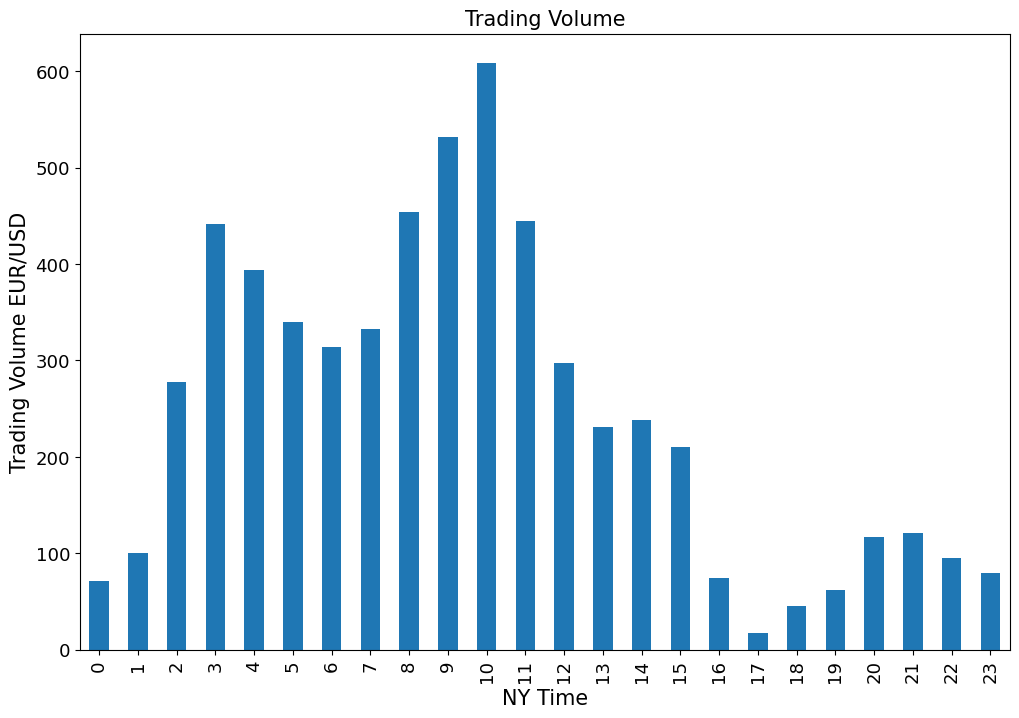

In [44]:
by_hour.volume.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Trading Volume EUR/USD", fontsize = 15)
plt.title("Trading Volume", fontsize = 15)
plt.show()

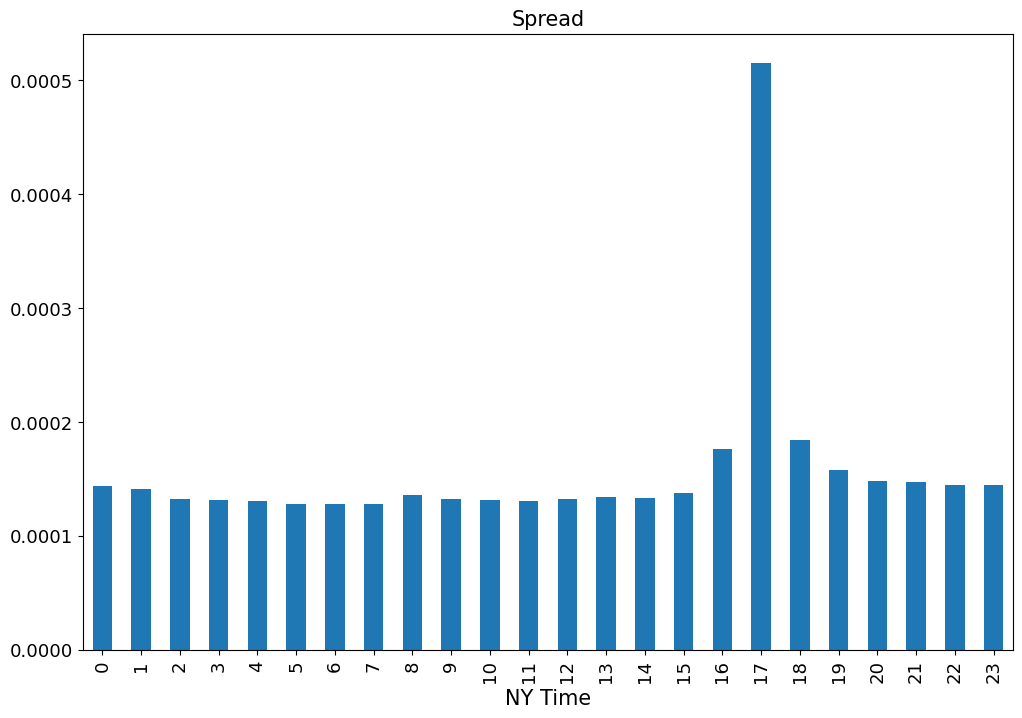

In [46]:
by_hour.spread.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.title("Spread", fontsize = 15)
plt.show()

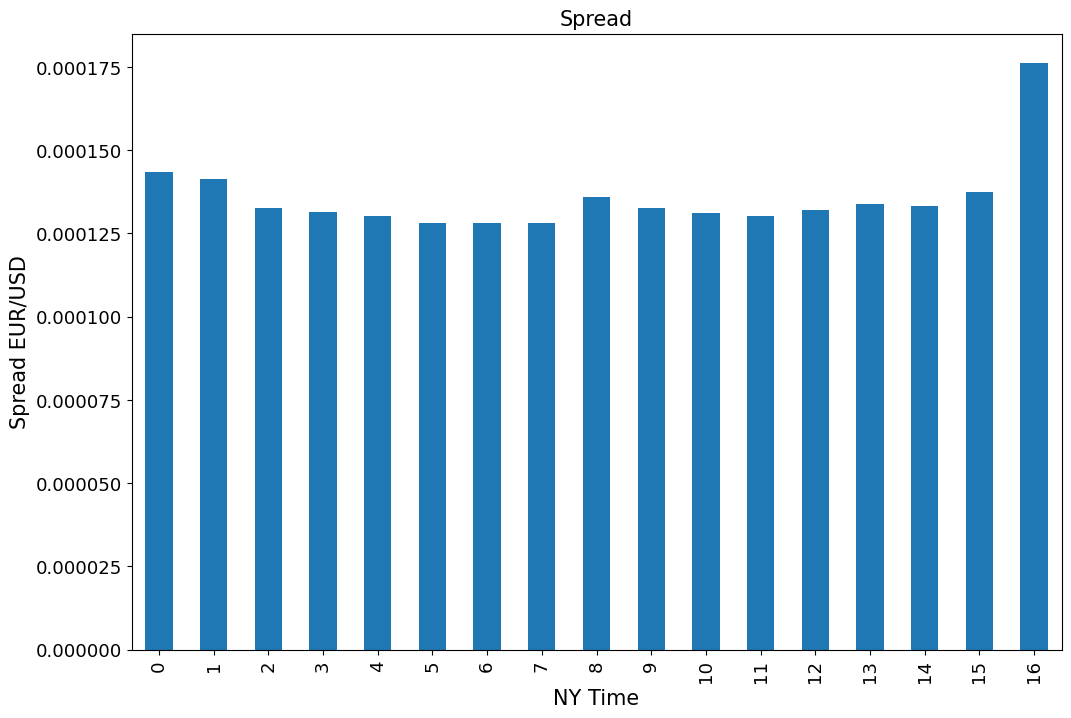

In [48]:
by_hour.loc[0:16, "spread"].plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Spread EUR/USD", fontsize = 15)
plt.title("Spread", fontsize = 15)
plt.show()

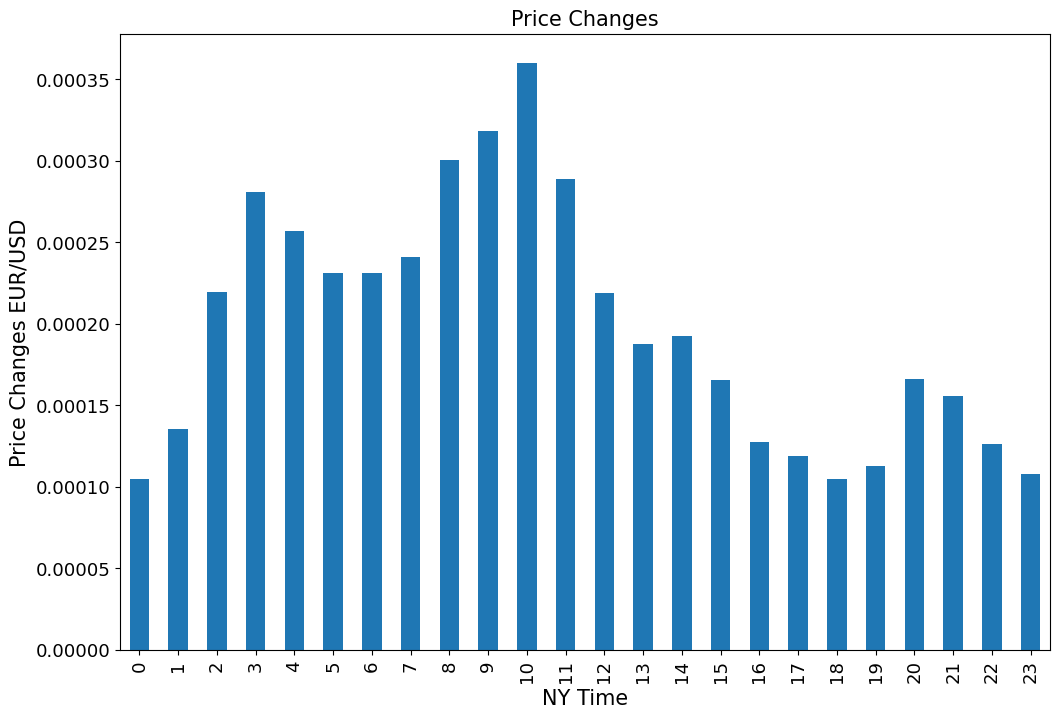

In [50]:
by_hour.price_change_abs.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Price Changes EUR/USD", fontsize = 15)
plt.title("Price Changes", fontsize = 15)
plt.show()